## loading data into yt from xarray 

requirements: 

* xarray
* yt_xarray (which needs yt>4.1.0)
* cartopy


In [1]:
import xarray as xr
import yt_xarray
import yt
import os
from cartopy.feature import NaturalEarthFeature

In [2]:
data_dir = yt.config.ytcfg.get("yt", "test_data_dir")
file = os.path.join(data_dir, "IRIS", "wUS-SH-2010_percent.nc")
file

'/home/chris/hdd/data/yt_data/yt_sample_sets/IRIS/wUS-SH-2010_percent.nc'

In [3]:
ds = xr.open_dataset(file)

In [4]:
ds

<xarray.Dataset>
Dimensions:    (depth: 19, latitude: 93, longitude: 122)
Coordinates:
  * depth      (depth) float32 60.0 90.0 125.0 160.0 ... 700.0 760.0 820.0 885.0
  * latitude   (latitude) float32 27.5 27.75 28.0 28.25 ... 50.0 50.25 50.5
  * longitude  (longitude) float32 -125.8 -125.5 -125.2 ... -96.0 -95.75 -95.5
Data variables:
    dvp        (depth, latitude, longitude) float32 ...
    dvs        (depth, latitude, longitude) float32 ...
Attributes: (12/32)
    title:                         P and S teleseismic body-wave tomography o...
    id:                            wUS-SH-2010_percent
    summary:                       Teleseismic travel-time residuals from the...
    keywords:                      seismic, tomography, compressional wave, p...
    Conventions:                   CF-1.0
    Metadata_Conventions:          Unidata Dataset Discovery v1.0
    ...                            ...
    author_email:                  bschmandt@unm.edu
    author_institution:            Department of Earth and Planetary Science,...
    author_url:                    
    repository_name:               EMC
    repository_institution:        IRIS DMC
    repository_pid:                doi:10.17611/DP/9991760

In [5]:
yt_ds = ds.yt.ds()

Inferred coordinate type is geodetic -- to override, use ds.yt.set_coordinate_type


yt : [INFO     ] 2022-10-13 12:02:10,698 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-10-13 12:02:10,708 Parameters: domain_dimensions         = [ 19  93 122]
yt : [INFO     ] 2022-10-13 12:02:10,711 Parameters: domain_left_edge          = [  60.     27.5  -125.75]
yt : [INFO     ] 2022-10-13 12:02:10,714 Parameters: domain_right_edge         = [885.   50.5 -95.5]
yt : [INFO     ] 2022-10-13 12:02:10,717 Parameters: cosmological_simulation   = 0


yt : [INFO     ] 2022-10-13 12:02:11,052 xlim = -125.750000 -95.500000
yt : [INFO     ] 2022-10-13 12:02:11,054 ylim = 27.500000 50.500000
yt : [INFO     ] 2022-10-13 12:02:11,055 Setting origin='native' for internal_geographic geometry.
yt : [INFO     ] 2022-10-13 12:02:11,059 xlim = -125.750000 -95.500000
yt : [INFO     ] 2022-10-13 12:02:11,060 ylim = 27.500000 50.500000
yt : [INFO     ] 2022-10-13 12:02:11,074 Making a fixed resolution buffer of (('stream', 'dvs')) 800 by 800



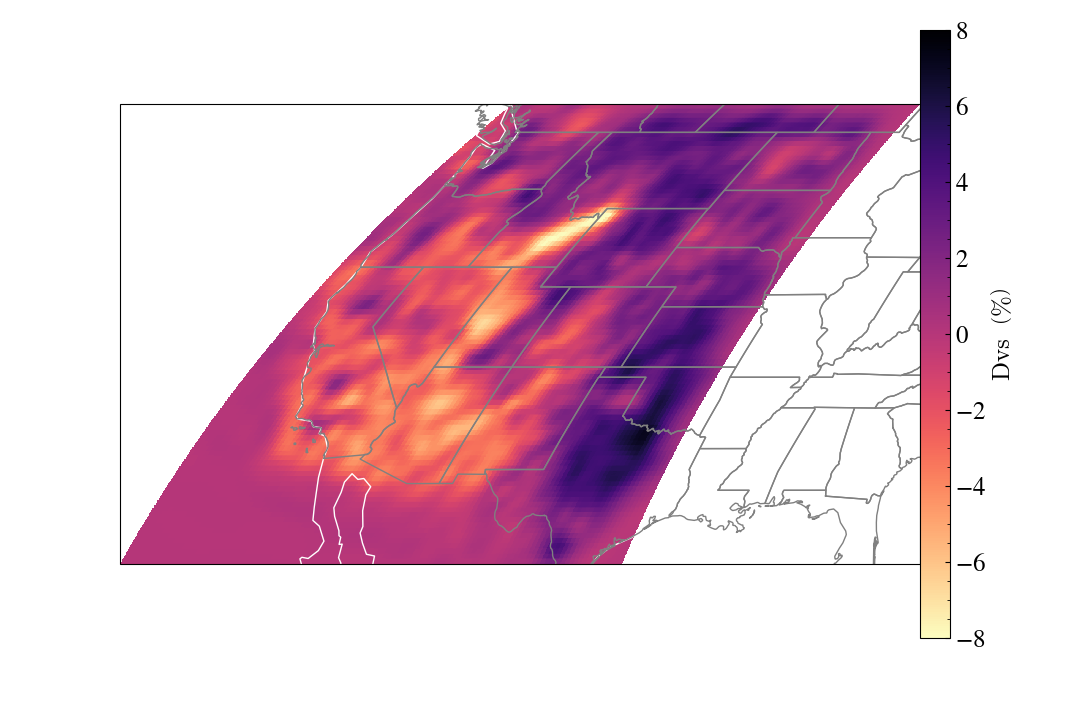

In [6]:
c = yt_ds.domain_center.copy()
c[0] = 150.
slc = yt.SlicePlot(yt_ds, "depth", ("stream", "dvs"), center = c)
slc.set_log(("stream", "dvs"), False)
slc.set_cmap(("stream", "dvs"), "magma_r")
slc.set_zlim(("stream", "dvs"), -8, 8)
slc._setup_plots()
slc[("stream", "dvs")].axes.add_feature(NaturalEarthFeature("physical", "coastline", "110m"), 
                                        facecolor="none", edgecolor='white')

states = NaturalEarthFeature(category='cultural', scale='50m', facecolor='none',
                             name='admin_1_states_provinces')
slc[("stream", "dvs")].axes.add_feature(states, edgecolor='gray')
slc.show()